C:\Users\USER\AppData\Local\Temp\ipykernel_1576\2710842288.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_civil_a['z'] = (df_civil_a['Value'] - civil_mean_a) / civil_sd_a
C:\Users\USER\AppData\Local\Temp\ipykernel_1576\2710842288.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_civil_b['z'] = (df_civil_b['Value'] - civil_mean_b) / civil_sd_b
C:\Users\USER\AppData\Local\Temp\ipykernel_1576\2710842288.py:170: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 

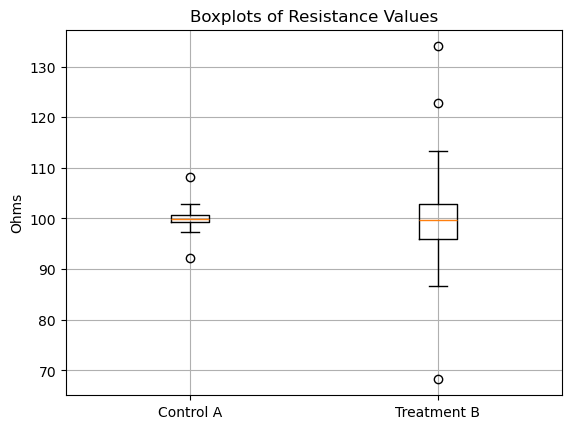

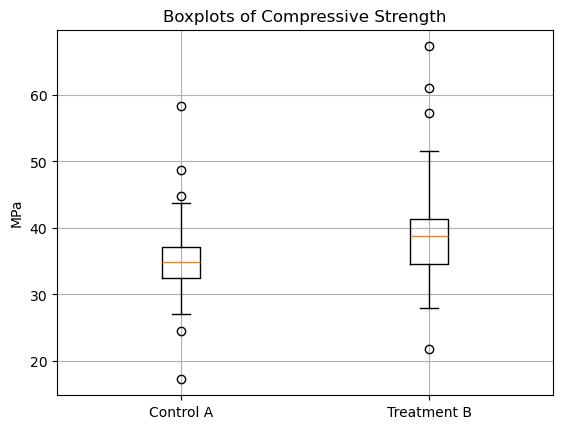

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import scrolledtext
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter.ttk import Notebook

# Filenames
electronics_file = "exploratory_problems_workbook - Electronics_Resistors.csv"
civil_file = "exploratory_problems_workbook - Civil_Concrete.csv"

# Load data
df_electronics = pd.read_csv(electronics_file)
df_civil = pd.read_csv(civil_file)

# Process Electronics
df_elec_a = df_electronics[df_electronics['Sample'] == 'Control_A']
df_elec_b = df_electronics[df_electronics['Sample'] == 'Treatment_B']
elec_a = df_elec_a['Value'].values
elec_b = df_elec_b['Value'].values

def compute_descriptive_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    sd = np.std(data)
    return mean, median, q1, q3, iqr, sd

elec_mean_a, elec_median_a, elec_q1_a, elec_q3_a, elec_iqr_a, elec_sd_a = compute_descriptive_stats(elec_a)
elec_mean_b, elec_median_b, elec_q1_b, elec_q3_b, elec_iqr_b, elec_sd_b = compute_descriptive_stats(elec_b)

def compute_deciles(data):
    return [np.percentile(data, i*10) for i in range(1, 10)]

elec_deciles_a = compute_deciles(elec_a)
elec_deciles_b = compute_deciles(elec_b)

elec_d1_interp = "D1 (10th percentile) is the value below which 10% of the data lies."
elec_d9_interp = "D9 (90th percentile) is the value above which 10% of the data lies."

def find_outliers(data, q1, q3, iqr):
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

elec_outliers_a = find_outliers(elec_a, elec_q1_a, elec_q3_a, elec_iqr_a)
elec_outliers_b = find_outliers(elec_b, elec_q1_b, elec_q3_b, elec_iqr_b)

elec_outliers_common = "Outliers are more common in Treatment_B" if len(elec_outliers_b) > len(elec_outliers_a) else "Outliers are more common in Control_A" if len(elec_outliers_a) > len(elec_outliers_b) else "Outliers are equally common in both."

all_elec_values = df_electronics['Value'].values
all_elec_samples = df_electronics['Sample'].values
elec_sorted_indices = np.argsort(all_elec_values)[::-1][:3]
elec_highest_three = all_elec_values[elec_sorted_indices]
elec_highest_samples = all_elec_samples[elec_sorted_indices]

elec_z_scores = []
for val, sample in zip(elec_highest_three, elec_highest_samples):
    if sample == 'Control_A':
        z = (val - elec_mean_a) / elec_sd_a
    else:
        z = (val - elec_mean_b) / elec_sd_b
    elec_z_scores.append(z)

elec_plausible = ["Plausible" if abs(z) < 3 else "Faulty" for z in elec_z_scores]

elec_consistent_supplier = "Control_A" if elec_iqr_a < elec_iqr_b else "Treatment_B"
elec_outliers_impact = "Outliers in resistor values can lead to inconsistent circuit behavior, potential overheating, or failure in sensitive electronics, affecting overall performance and reliability."
elec_choice = "As a design engineer, I would choose Control_A for its higher consistency and fewer outliers, ensuring better reliability in circuits."

# Process Civil
df_civil_a = df_civil[df_civil['Sample'] == 'Control_A']
df_civil_b = df_civil[df_civil['Sample'] == 'Treatment_B']
civil_a = df_civil_a['Value'].values
civil_b = df_civil_b['Value'].values

def compute_descriptive_stats_civil(data):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    sd = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    return mean, median, q1, q3, iqr, sd, min_val, max_val

civil_mean_a, civil_median_a, civil_q1_a, civil_q3_a, civil_iqr_a, civil_sd_a, civil_min_a, civil_max_a = compute_descriptive_stats_civil(civil_a)
civil_mean_b, civil_median_b, civil_q1_b, civil_q3_b, civil_iqr_b, civil_sd_b, civil_min_b, civil_max_b = compute_descriptive_stats_civil(civil_b)

def compute_percentiles(data):
    p10 = np.percentile(data, 10)
    p25 = np.percentile(data, 25)
    p50 = np.percentile(data, 50)
    p75 = np.percentile(data, 75)
    p90 = np.percentile(data, 90)
    return p10, p25, p50, p75, p90

civil_p10_a, civil_p25_a, civil_p50_a, civil_p75_a, civil_p90_a = compute_percentiles(civil_a)
civil_p10_b, civil_p25_b, civil_p50_b, civil_p75_b, civil_p90_b = compute_percentiles(civil_b)

def find_outliers_df(group_df, q1, q3, iqr):
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group_df[(group_df['Value'] < lower_bound) | (group_df['Value'] > upper_bound)]
    return outliers[['ID', 'Value']]

civil_outliers_a_df = find_outliers_df(df_civil_a, civil_q1_a, civil_q3_a, civil_iqr_a)
civil_outliers_b_df = find_outliers_df(df_civil_b, civil_q1_b, civil_q3_b, civil_iqr_b)

# Compute z-scores for all
df_civil_a['z'] = (df_civil_a['Value'] - civil_mean_a) / civil_sd_a
df_civil_b['z'] = (df_civil_b['Value'] - civil_mean_b) / civil_sd_b
df_civil_all = pd.concat([df_civil_a, df_civil_b])
civil_extreme_indices = df_civil_all['z'].abs().argsort()[-3:][::-1]  # Top 3 largest |z|
civil_extreme = df_civil_all.iloc[civil_extreme_indices]
civil_extreme_z = civil_extreme['z'].values
civil_extreme_values = civil_extreme['Value'].values
civil_extreme_ids = civil_extreme['ID'].values
civil_extreme_outlier = ["Yes" if abs(z) > 3 else "No" for z in civil_extreme_z]

# Interpretation
civil_higher_central = "Treatment_B" if civil_mean_b > civil_mean_a else "Control_A"
civil_more_variable = "Treatment_B" if civil_sd_b > civil_sd_a else "Control_A"
civil_recommend = "Yes, because Treatment_B has higher central strength and acceptable variability." if civil_mean_b > civil_mean_a else "No, because Control_A has higher central strength."

# Create GUI
root = tk.Tk()
root.title("Analysis")

notebook = Notebook(root)
notebook.pack(fill='both', expand=True)

# Electronics Tab
elec_frame = tk.Frame(notebook)
notebook.add(elec_frame, text='Electronics Resistors')

elec_text_area = scrolledtext.ScrolledText(elec_frame, wrap=tk.WORD, width=80, height=20)
elec_text_area.pack(pady=10)

elec_text_area.insert(tk.INSERT, "Task 2: Descriptive Stats\n")
elec_text_area.insert(tk.INSERT, f"Control_A: Mean={elec_mean_a:.2f}, Median={elec_median_a:.2f}, Q1={elec_q1_a:.2f}, Q3={elec_q3_a:.2f}, IQR={elec_iqr_a:.2f}, SD={elec_sd_a:.2f}\n")
elec_text_area.insert(tk.INSERT, f"Treatment_B: Mean={elec_mean_b:.2f}, Median={elec_median_b:.2f}, Q1={elec_q1_b:.2f}, Q3={elec_q3_b:.2f}, IQR={elec_iqr_b:.2f}, SD={elec_sd_b:.2f}\n\n")

elec_text_area.insert(tk.INSERT, "Task 3: Deciles\n")
elec_text_area.insert(tk.INSERT, f"Control_A Deciles (D1-D9): {', '.join([f'{d:.2f}' for d in elec_deciles_a])}\n")
elec_text_area.insert(tk.INSERT, f"Treatment_B Deciles (D1-D9): {', '.join([f'{d:.2f}' for d in elec_deciles_b])}\n")
elec_text_area.insert(tk.INSERT, f"Interpretation: {elec_d1_interp} {elec_d9_interp}\n\n")

elec_text_area.insert(tk.INSERT, "Task 4: Outliers\n")
elec_text_area.insert(tk.INSERT, f"Control_A Outliers: {', '.join([f'{o:.2f}' for o in elec_outliers_a])}\n")
elec_text_area.insert(tk.INSERT, f"Treatment_B Outliers: {', '.join([f'{o:.2f}' for o in elec_outliers_b])}\n")
elec_text_area.insert(tk.INSERT, f"Discussion: {elec_outliers_common}\n\n")

elec_text_area.insert(tk.INSERT, "Task 5: Z-scores for highest three\n")
for i, (val, z, p) in enumerate(zip(elec_highest_three, elec_z_scores, elec_plausible)):
    elec_text_area.insert(tk.INSERT, f"Highest {i+1}: {val:.2f} (Z={z:.2f}, {p})\n")
elec_text_area.insert(tk.INSERT, "\n")

elec_text_area.insert(tk.INSERT, "Task 6: Interpretation\n")
elec_text_area.insert(tk.INSERT, f"More consistent: {elec_consistent_supplier}\n")
elec_text_area.insert(tk.INSERT, f"Outliers impact: {elec_outliers_impact}\n")
elec_text_area.insert(tk.INSERT, f"Choice: {elec_choice}\n")

elec_fig, elec_ax = plt.subplots()
elec_ax.boxplot([elec_a, elec_b], labels=['Control A', 'Treatment B'])
elec_ax.set_title('Boxplots of Resistance Values')
elec_ax.set_ylabel('Ohms')
elec_ax.grid(True)

elec_canvas = FigureCanvasTkAgg(elec_fig, master=elec_frame)
elec_canvas.draw()
elec_canvas.get_tk_widget().pack()

# Civil Tab
civil_frame = tk.Frame(notebook)
notebook.add(civil_frame, text='Civil Concrete')

civil_text_area = scrolledtext.ScrolledText(civil_frame, wrap=tk.WORD, width=80, height=20)
civil_text_area.pack(pady=10)

civil_text_area.insert(tk.INSERT, "Task 2: Descriptive Stats\n")
civil_text_area.insert(tk.INSERT, f"Control_A: Mean={civil_mean_a:.2f}, Median={civil_median_a:.2f}, Q1={civil_q1_a:.2f}, Q3={civil_q3_a:.2f}, IQR={civil_iqr_a:.2f}, SD={civil_sd_a:.2f}, Min={civil_min_a:.2f}, Max={civil_max_a:.2f}\n")
civil_text_area.insert(tk.INSERT, f"Treatment_B: Mean={civil_mean_b:.2f}, Median={civil_median_b:.2f}, Q1={civil_q1_b:.2f}, Q3={civil_q3_b:.2f}, IQR={civil_iqr_b:.2f}, SD={civil_sd_b:.2f}, Min={civil_min_b:.2f}, Max={civil_max_b:.2f}\n\n")

civil_text_area.insert(tk.INSERT, "Task 3: Percentiles\n")
civil_text_area.insert(tk.INSERT, f"Control_A: 10th={civil_p10_a:.2f}, 25th={civil_p25_a:.2f}, 50th={civil_p50_a:.2f}, 75th={civil_p75_a:.2f}, 90th={civil_p90_a:.2f}\n")
civil_text_area.insert(tk.INSERT, f"Treatment_B: 10th={civil_p10_b:.2f}, 25th={civil_p25_b:.2f}, 50th={civil_p50_b:.2f}, 75th={civil_p75_b:.2f}, 90th={civil_p90_b:.2f}\n\n")

civil_text_area.insert(tk.INSERT, "Task 4: Outliers\n")
civil_text_area.insert(tk.INSERT, "Control_A Outliers:\n")
for _, row in civil_outliers_a_df.iterrows():
    civil_text_area.insert(tk.INSERT, f"ID: {row['ID']}, Value: {row['Value']:.2f}\n")
civil_text_area.insert(tk.INSERT, "Treatment_B Outliers:\n")
for _, row in civil_outliers_b_df.iterrows():
    civil_text_area.insert(tk.INSERT, f"ID: {row['ID']}, Value: {row['Value']:.2f}\n")
civil_text_area.insert(tk.INSERT, "\n")

civil_text_area.insert(tk.INSERT, "Task 5: Z-scores for 3 most extreme values\n")
for i, (id_, val, z, out) in enumerate(zip(civil_extreme_ids, civil_extreme_values, civil_extreme_z, civil_extreme_outlier)):
    civil_text_area.insert(tk.INSERT, f"Extreme {i+1}: ID={id_}, Value={val:.2f}, Z={z:.2f}, Outlier: {out}\n")
civil_text_area.insert(tk.INSERT, "\n")

civil_text_area.insert(tk.INSERT, "Task 6: Interpretation\n")
civil_text_area.insert(tk.INSERT, f"Which mix has higher central strength? {civil_higher_central}\n")
civil_text_area.insert(tk.INSERT, f"Which mix is more variable? {civil_more_variable}\n")
civil_text_area.insert(tk.INSERT, f"Would you recommend adopting the new additive? {civil_recommend}\n")

civil_fig, civil_ax = plt.subplots()
civil_ax.boxplot([civil_a, civil_b], labels=['Control A', 'Treatment B'])
civil_ax.set_title('Boxplots of Compressive Strength')
civil_ax.set_ylabel('MPa')
civil_ax.grid(True)

civil_canvas = FigureCanvasTkAgg(civil_fig, master=civil_frame)
civil_canvas.draw()
civil_canvas.get_tk_widget().pack()

root.mainloop()